<a href="https://colab.research.google.com/github/seisbench/seisbench/blob/additional_example_workflows/examples/01a_dataset_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://raw.githubusercontent.com/seisbench/seisbench/main/docs/_static/seisbench_logo_subtitle_outlined.svg)

*This code is necessary on colab to install SeisBench. If SeisBench is already installed on your machine, you can skip this.*

In [1]:
#!pip install seisbench

# Dataset basics

This tutorial introduces the basics of datasets and benchmark datasets in SeisBench. It explains how load a dataset, how to filter it and how to access the data.

In [1]:
import seisbench
import seisbench.data as sbd

### Loading a dataset

There are two ways of loading a dataset:
1. loading a benchmark dataset
2. loading a dataset from disk

We will first explore benchmark datasets. Benchmark datasets are represented by classes in SeisBench. When instantiating the class, SeisBench will check if the data is available and otherwise download it. Our example dataset is the Iquique, that we load below.

In [2]:
data = sbd.Iquique()
print(data)

2022-06-27 10:58:16,752 | seisbench | WARNING | Check available storage and memory before downloading and general use of Iquique dataset. Dataset size: waveforms.hdf5 ~5Gb, metadata.csv ~2.6Mb


Iquique - 13400 traces


When running this command for the first time, the dataset is downloaded. All downloaded data is stored in the SeisBench cache. The location of the cache defaults to `~/.seisbench`, but can be set using the environment variable `SEISBENCH_CACHE_ROOT`. Let's inspect the cache. Depending which commands where used before, it contains at least the directory `datasets`. Inside this directory, each locally available dataset has its own folder. If we look into the folder `dummydataset`, we find two relevant files `metadata.csv` and `waveforms.hdf5`, containing the metadata and the waveforms.

In [4]:
import os
print("Cache root:", seisbench.cache_root)
print("Contents:", os.listdir(seisbench.cache_root))
print("datasets:", os.listdir(seisbench.cache_root / "datasets"))
print("dummydataset:", os.listdir(seisbench.cache_root / "datasets" / "iquique"))

Cache root: /home/javak/.seisbench
Contents: ['datasets', 'config.json', 'models']
datasets: ['iquique', 'dummydataset', 'geofon']
dummydataset: ['waveforms.hdf5', 'metadata.csv']


The second way of loading a dataset is loading it from disk by simply providing the path to the directory containing the `metadata.csv` and `waveforms.hdf5` files. We'll demonstrate this using the DummyDataset, even though we'd always recommend loading benchmark dataset through their classes.

In [5]:
iquique_from_disk = sbd.WaveformDataset(seisbench.cache_root / "datasets" / "iquique")
print(iquique_from_disk)

Unnamed dataset - 13400 traces


### What does a dataset contain?

Each dataset consists of waveforms and the associated metadata. Let's first inspect the metadata. It is represented by a pandas DataFrame and lists for each trace different attributes, describing properties of the source, the trace, the station and possibly the path. When loading a dataset, only the metadata is loaded into memory. The waveforms are loaded on demand. For details, see the section on "Configuring a dataset".

In [6]:
data.metadata

,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,path_back_azimuth_deg,station_network_code,station_code,trace_channel,station_location_code,station_latitude_deg,...,trace_sampling_rate_hz,trace_completeness,trace_has_spikes,trace_start_time,trace_P_arrival_sample,trace_S_arrival_sample,trace_name_original,trace_chunk,trace_component_order,split
0,2014-05-01T00:52:20.970000Z,-19.4527,-69.9762,57.95,161.009411,7K,BOLO,EH*,NaN,-18.3400,...,100.0,1.0,False,2014-05-01T00:52:20.630000Z,2000.0,3564.0,7K.BOLO.,,ZNE,train
1,2014-05-01T00:52:20.970000Z,-19.4527,-69.9762,57.95,311.334575,CX,PB08,HH*,NaN,-20.1411,...,100.0,1.0,False,2014-05-01T00:52:19.048393Z,2000.0,NaN,CX.PB08.,,ZNE,test
2,2014-05-01T00:52:20.970000Z,-19.4527,-69.9762,57.95,329.936310,DG,IN17,HH*,NaN,-20.4800,...,100.0,1.0,False,2014-05-01T00:52:20.740000Z,2000.0,3551.0,DG.IN17.,,ZNE,dev
3,2014-05-01T00:52:20.970000Z,-19.4527,-69.9762,57.95,327.358785,DG,IN06,HH*,NaN,-19.6100,...,100.0,1.0,False,2014-05-01T00:52:09.279762Z,2000.0,2697.0,DG.IN06.,,ZNE,train
4,2014-05-01T00:52:20.970000Z,-19.4527,-69.9762,57.95,211.759639,DG,IN10,HH*,NaN,-19.2900,...,100.0,1.0,False,2014-05-01T00:52:09.700000Z,2000.0,2761.0,DG.IN10.,,ZNE,dev
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13395,2014-05-30T07:28:54.290000Z,-19.9427,-70.3741,19.73,211.433440,DG,IN23,HH*,NaN,-18.8700,...,100.0,1.0,False,2014-05-30T07:28:55.540000Z,2000.0,NaN,DG.IN23.,,ZNE,test
13396,2014-05-30T07:28:54.290000Z,-19.9427,-70.3741,19.73,198.209665,DG,IN26,HH*,NaN,-19.0400,...,100.0,1.0,False,2014-05-30T07:28:50.370000Z,2000.0,NaN,DG.IN26.,,ZNE,train
13397,2014-05-30T07:28:54.290000Z,-19.9427,-70.3741,19.73,254.910454,CX,PB11,HH*,NaN,-19.7610,...,100.0,1.0,False,2014-05-30T07:28:46.050000Z,2000.0,2938.0,CX.PB11.,,ZNE,test
13398,2014-05-30T07:28:54.290000Z,-19.9427,-70.3741,19.73,181.875522,CX,PB12,HH*,NaN,-18.6141,...,100.0,1.0,False,2014-05-30T07:28:56.100000Z,2000.0,NaN,CX.PB12.,,ZNE,train


Now let's say, we want to obtain the waveforms associated with trace 3. This can be done using the `get_waveforms` method.

waveforms.shape: [[ 208.47940658  183.47940658  165.47940658 ... -145.52059342
  -108.52059342  -96.52059342]
 [ 137.32021406  146.32021406  138.32021406 ...  444.32021406
   451.32021406  462.32021406]
 [  29.57024793   29.57024793   29.57024793 ...  518.57024793
   530.57024793  531.57024793]]


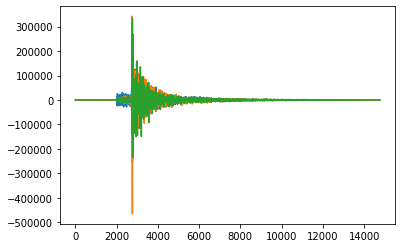

In [7]:
waveforms = data.get_waveforms(4)
print("waveforms.shape:", waveforms)

import matplotlib.pyplot as plt
plt.plot(waveforms.T);

You can also request waveforms for multiple traces at once.

In [8]:
waveforms = data.get_waveforms([3, 20, 45, 70])
print("waveforms.shape:", waveforms.shape)

waveforms.shape: (4, 3, 16139)


Benchmark dataset contain several special attributes, which simple waveform dataset do not posses. Here are two examples:

In [9]:
print('Citation:', data.citation)
print('License:', data.license)

Citation: Woollam, J., Rietbrock, A., Bueno, A. and De Angelis, S., 2019. Convolutional neural network for seismic phase classification, performance demonstration over a local seismic network. Seismological Research Letters, 90(2A), pp.491-502. https://doi.org/10.1785/0220180312
License: None


### Filtering a dataset

Often, you don't want to use a full dataset, but only parts of it. For this, datasets offer the `filter` method. By default `filter` is applied inplace, but it can also be used to return the desired subset.

In [10]:
mask = data.metadata["source_depth_km"] > 10  # Only select events with magnitude above 2.5
data.filter(mask)

print(data)
data.metadata

Iquique - 13400 traces


,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,path_back_azimuth_deg,station_network_code,station_code,trace_channel,station_location_code,station_latitude_deg,...,trace_sampling_rate_hz,trace_completeness,trace_has_spikes,trace_start_time,trace_P_arrival_sample,trace_S_arrival_sample,trace_name_original,trace_chunk,trace_component_order,split
0,2014-05-01T00:52:20.970000Z,-19.4527,-69.9762,57.95,161.009411,7K,BOLO,EH*,NaN,-18.3400,...,100.0,1.0,False,2014-05-01T00:52:20.630000Z,2000.0,3564.0,7K.BOLO.,,ZNE,train
1,2014-05-01T00:52:20.970000Z,-19.4527,-69.9762,57.95,311.334575,CX,PB08,HH*,NaN,-20.1411,...,100.0,1.0,False,2014-05-01T00:52:19.048393Z,2000.0,NaN,CX.PB08.,,ZNE,test
2,2014-05-01T00:52:20.970000Z,-19.4527,-69.9762,57.95,329.936310,DG,IN17,HH*,NaN,-20.4800,...,100.0,1.0,False,2014-05-01T00:52:20.740000Z,2000.0,3551.0,DG.IN17.,,ZNE,dev
3,2014-05-01T00:52:20.970000Z,-19.4527,-69.9762,57.95,327.358785,DG,IN06,HH*,NaN,-19.6100,...,100.0,1.0,False,2014-05-01T00:52:09.279762Z,2000.0,2697.0,DG.IN06.,,ZNE,train
4,2014-05-01T00:52:20.970000Z,-19.4527,-69.9762,57.95,211.759639,DG,IN10,HH*,NaN,-19.2900,...,100.0,1.0,False,2014-05-01T00:52:09.700000Z,2000.0,2761.0,DG.IN10.,,ZNE,dev
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13395,2014-05-30T07:28:54.290000Z,-19.9427,-70.3741,19.73,211.433440,DG,IN23,HH*,NaN,-18.8700,...,100.0,1.0,False,2014-05-30T07:28:55.540000Z,2000.0,NaN,DG.IN23.,,ZNE,test
13396,2014-05-30T07:28:54.290000Z,-19.9427,-70.3741,19.73,198.209665,DG,IN26,HH*,NaN,-19.0400,...,100.0,1.0,False,2014-05-30T07:28:50.370000Z,2000.0,NaN,DG.IN26.,,ZNE,train
13397,2014-05-30T07:28:54.290000Z,-19.9427,-70.3741,19.73,254.910454,CX,PB11,HH*,NaN,-19.7610,...,100.0,1.0,False,2014-05-30T07:28:46.050000Z,2000.0,2938.0,CX.PB11.,,ZNE,test
13398,2014-05-30T07:28:54.290000Z,-19.9427,-70.3741,19.73,181.875522,CX,PB12,HH*,NaN,-18.6141,...,100.0,1.0,False,2014-05-30T07:28:56.100000Z,2000.0,NaN,CX.PB12.,,ZNE,train


A special case of filtering is to access the training, development and test splits of a dataset. Most datasets in SeisBench define those splits.

In [11]:
data = sbd.Iquique() # Reload to ensure we have the full dataset again

train = data.train()
dev = data.dev()
test = data.test()

print("Train:", train)
print("Dev:", dev)
print("Test:", test)

2022-06-25 22:20:13,018 | seisbench | WARNING | Check available storage and memory before downloading and general use of Iquique dataset. Dataset size: waveforms.hdf5 ~5Gb, metadata.csv ~2.6Mb


Train: Iquique - 8040 traces
Dev: Iquique - 1340 traces
Test: Iquique - 4020 traces


You can also use a shorthand notation to split the dataset into its parts:

In [12]:
train, dev, test = data.train_dev_test()

print("Train:", train)
print("Dev:", dev)
print("Test:", test)

Train: Iquique - 8040 traces
Dev: Iquique - 1340 traces
Test: Iquique - 4020 traces


### Configuring a dataset

Datasets offer a range of configuration options. Here, we are going to explore four of them:

- component order
- dimension order
- sampling rate
- waveform caching

Standard seismometers will consist of three components, commonly vertical (Z), north-south (N) and east-west (E). Depending on your application, you'll need to arrange the components differently. SeisBench can do this automatically. Here is an example:

In [13]:
data = sbd.Iquique(component_order="ZNE")
zne_array = data.get_waveforms(0)

data = sbd.Iquique(component_order="NEZ")
nez_array = data.get_waveforms(0)

print('ZNE:\n', zne_array[:, :5])
print('NEZ:\n', nez_array[:, :5])

2022-06-25 22:20:13,565 | seisbench | WARNING | Check available storage and memory before downloading and general use of Iquique dataset. Dataset size: waveforms.hdf5 ~5Gb, metadata.csv ~2.6Mb
2022-06-25 22:20:13,704 | seisbench | WARNING | Check available storage and memory before downloading and general use of Iquique dataset. Dataset size: waveforms.hdf5 ~5Gb, metadata.csv ~2.6Mb


ZNE:
 [[-3456.97545618 -3258.97545618 -2928.97545618 -2388.97545618
  -1505.97545618]
 [-1260.0849396  -1331.0849396  -1305.0849396  -1256.0849396
  -1237.0849396 ]
 [ 1498.90812131  1837.90812131  2177.90812131  2478.90812131
   2705.90812131]]
NEZ:
 [[-1260.0849396  -1331.0849396  -1305.0849396  -1256.0849396
  -1237.0849396 ]
 [ 1498.90812131  1837.90812131  2177.90812131  2478.90812131
   2705.90812131]
 [-3456.97545618 -3258.97545618 -2928.97545618 -2388.97545618
  -1505.97545618]]


Sometimes, not all components are available. You can use the `missing_components` parameter to define how to handle this case. Check the documentation for details.

Similar to the component order, the dimension order specifies how to order the dimensions of your data, i.e., the traces (N), the channels (C) and the samples (W).

In [14]:
data = sbd.Iquique(dimension_order="NCW")
waveforms = data.get_waveforms([3, 20, 45, 70])
print("NCW - waveforms.shape:", waveforms.shape)

data = sbd.Iquique(dimension_order="NWC")
waveforms = data.get_waveforms([3, 20, 45, 70])
print("NWC - waveforms.shape:", waveforms.shape)

2022-06-25 22:20:13,941 | seisbench | WARNING | Check available storage and memory before downloading and general use of Iquique dataset. Dataset size: waveforms.hdf5 ~5Gb, metadata.csv ~2.6Mb
2022-06-25 22:20:14,110 | seisbench | WARNING | Check available storage and memory before downloading and general use of Iquique dataset. Dataset size: waveforms.hdf5 ~5Gb, metadata.csv ~2.6Mb


NCW - waveforms.shape: (4, 3, 16139)
NWC - waveforms.shape: (4, 16139, 3)


Often, applications will require waveforms of a specific sampling rate. By default, seisbench will return data at the sampling rate provided in the dataset. However, you can configure datasets to always return a specific sampling rate, simply by setting it in the constructor. SeisBench will then automatically resample the trace.

In [15]:
data = sbd.Iquique(sampling_rate=100)
waveforms = data.get_waveforms(3)
print("100 Hz - waveforms.shape:", waveforms.shape)

data = sbd.Iquique(sampling_rate=200)
waveforms = data.get_waveforms(3)
print("200 Hz - waveforms.shape:", waveforms.shape)

2022-06-25 22:20:14,400 | seisbench | WARNING | Check available storage and memory before downloading and general use of Iquique dataset. Dataset size: waveforms.hdf5 ~5Gb, metadata.csv ~2.6Mb
2022-06-25 22:20:14,533 | seisbench | WARNING | Check available storage and memory before downloading and general use of Iquique dataset. Dataset size: waveforms.hdf5 ~5Gb, metadata.csv ~2.6Mb


100 Hz - waveforms.shape: (3, 14698)
200 Hz - waveforms.shape: (3, 29396)


Alternatively, you can specify the sampling rate in a call to `get_waveforms`.

In [16]:
data = sbd.Iquique()

waveforms = data.get_waveforms(3, sampling_rate=100)
print("100 Hz - waveforms.shape:", waveforms.shape)
waveforms = data.get_waveforms(3, sampling_rate=200)
print("200 Hz - waveforms.shape:", waveforms.shape)

2022-06-25 22:20:14,830 | seisbench | WARNING | Check available storage and memory before downloading and general use of Iquique dataset. Dataset size: waveforms.hdf5 ~5Gb, metadata.csv ~2.6Mb


100 Hz - waveforms.shape: (3, 14698)
200 Hz - waveforms.shape: (3, 29396)


The last configuration option discussed in this tutorial is waveform caching. As mentioned earlier, loading a dataset actually only loads the metadata into memory, and only reads the waveforms on demand. Depending on your use case, this might not be the optimal scenario. For example, when training a deep learning model, it's usually best to first load all the waveforms into memory, instead of reloading them from disk every epoch. Therefore, SeisBench allows to cache waveforms in memory and to preload them into memory. Here is an example:

In [21]:
data = sbd.Iquique(cache='trace')
data.preload_waveforms(pbar=True)

2022-06-25 22:23:30,849 | seisbench | WARNING | Check available storage and memory before downloading and general use of Iquique dataset. Dataset size: waveforms.hdf5 ~5Gb, metadata.csv ~2.6Mb
Preloading waveforms: 100%|██████████| 13400/13400 [00:58<00:00, 229.52it/s]


You can either use a `trace` cache or a `full` cache. Check the documentation for details on these strategies. As a rule of thumb, `trace` should be used if you only need a small fraction of the dataset, while `full` is better suited when using most of the dataset or a full train/dev/test split. Note that `full` might cache traces that you did not actually filter for. On the other side, `full` will have better read performance than `trace` when using many traces.

In general, when preloading and filtering a dataset, you should always first filter it and then preload to avoid loading unnecessary traces.

### Visualizing a dataset

If you have the package `cartopy` installed, you can visualize your dataset using the method `plot_map`.

In [20]:
data.plot_map()

ModuleNotFoundError: Plotting the data set requires cartopy. Please install cartopy, e.g., using conda.

<Figure size 1080x720 with 0 Axes>